## Лабораторная работа 1

# "Классические ML модели, работа с табличными данными"
***
Задание:  

1) Разведовательный анализ данных (EDA).  

		1) узнать больше про физический смысл параметров объектов,
		2) посмотреть на типы
		3) наличие пропусков
		4) общий объем выборки
		5) проанализировать признаки: 
			a) по составу
			b) по отношению к целевой переменной (target-у)
			c) по отношению друг к другу
		6) анализ выбросов
		7) проверить автокорреляцию
		8) проверить мультиколлинеарность  
        
2) Рассмотреть две задачи: классификацию и регрессию.  

	1) Сделать предположение о природе зависимости между target-ом и вашими данными
	2) обучить соответсвующую модель
		*2.1) Переобучить, сравнить с "нормально" обученной
	3) проанализировать результаты. (Например, оценить степень переобучения)
		*3.1) провести тесты на значимость коэффициентов регрессии.
		*3.2) Тест на значимость регрессии
	4) попробовать настроить гиперпараметры модели.
	5) Выбрать еще минимум две модели, обучить, сравнить результаты
	6) Feature Selection
	7) используйте регуляризатор, если в этом есть необходимость.  
    
*3) Возможно ли применить Feature Engineering для обогощения модели? Провести эксперименты
*4) Попробовать PCA / SVD для сокращения размерности данных. Как это повлияет на процесс обучения и на резульат?
*5) Объединить результаты нескольких моделей. Подумайте, как это можно сделать. Провести эксперименты.
*6) Попробовать больше моделей / более сложные модели.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.simplefilter('ignore')

В современном мире компании все больше нуждаются в талантливых и креативных сотрудниках, предлагающих свежие нестандартные подходы к решению задач. Поэтому, набор выпускников ВУЗов является обычной практикой для организаций. Традиционные методы подбора персонала и процессы подбора в данном случае могут давать ошибки. Для оптимизации этого процесса также необходимы инновационные методы.  

Задача: построить модель ML, используя резюме потенциального кандидата на вакансию, предсказать, получит ли кандидат место в компании.  

## Разведовательный анализ данных (EDA)  

В таблице представленные данные из резюме кандидатов. Они включают следующие столбцы:
* gender: пол кандидата
* ssc_percentage : средний экзаменационный балл при окончании средней школы (%, где 100 это max оценка)
* ssc_board : статус средней школы (по местонахождению - крупный город или регион)
* hsc_percentage : средний экзаменационный балл при окончании старшей школы (%, где 100 это max оценка) 
* hsc_borad : статус старшей школы (по местонахождению - крупный город или регион)
* hsc_subject : профильный предмет в старшей школе (уклон)
* degree_percentage : средний экзаменационный балл в бакалавриате
* undergrad_degree : специальность в бакалавриате
* work_experience : опыт работы (есть / нет)
* emp_test_percentage : балл за тест на профпригодность
* specialization : квалификация, полученная в магистратуре (MBA specialization)
* mba_percent : средний экзаменационный балл в магистратуре
* status (TARGET) : статус - получил должность или нет

In [2]:
df = pd.read_csv('D:\Data/HR_dataset.csv')
df.head(10)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


Изучим с какими данными нам предстоит работать: посмотрим на тип данных, колличество пропусков в данных, наличие дубликатов, изучим описательную статистику

In [3]:
df.info() # тип данных, количество строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [4]:
df.isna().sum() # пропуски

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [5]:
df.duplicated().sum() # дупликаты

0

In [6]:
df.describe() # статистика числовых признаков

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


В датасете 215 строк, пропусков и дупликатов нет.  

Построим гистограммы распределения данных в рамках отдельных категориальных признаков

<AxesSubplot:title={'center':'Variable status'}, xlabel='status', ylabel='count'>

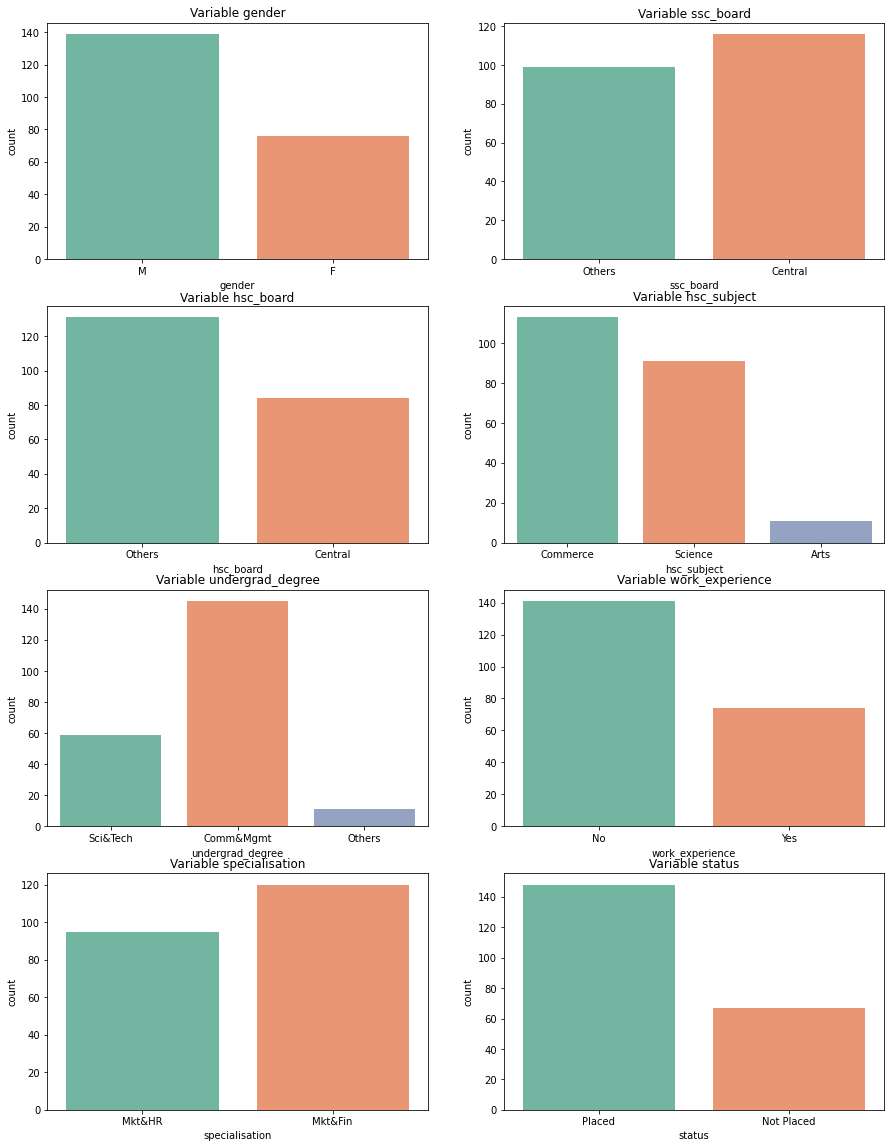

In [7]:
plt.figure(figsize = (15,20))

plt.subplot(4,2,1)
plt.gca().set_title('Variable gender')
sns.countplot(x = 'gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable ssc_board')
sns.countplot(x = 'ssc_board', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable hsc_board')
sns.countplot(x = 'hsc_board', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable hsc_subject')
sns.countplot(x = 'hsc_subject', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable undergrad_degree')
sns.countplot(x = 'undergrad_degree', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable work_experience')
sns.countplot(x = 'work_experience', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable specialisation')
sns.countplot(x = 'specialisation', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable status')
sns.countplot(x = 'status', palette = 'Set2', data = df)

Итак, что мы видим: 
- соискателей мужчин почти в 2 раза больше, чем женщин; 
- местоположение школ нам не дает особой информации (по причине происхождения данных. Скорее всего данные получены из Индии, для выводов по этим признакам сначала необходимо изучить их традиции и законодательство);
- наибольшей популярностью в старших классах пользуется профиль Commerce (бизнес), на втором месте стоит Science (наука). Можно сказать, что Arts (искусство) мало популярно;
- в бакалавриате студенты отдают предпочтение специальностям, связанным с Comm&Mgmt (бизнес и менеджмент);
- большинство соискателей не имеют опыта работы;
- большинство соискателей было принято на работу.  


Построим попарные диаграммы числовых признаков и посмотрим коррелируют ли они между собой

<Figure size 720x720 with 0 Axes>

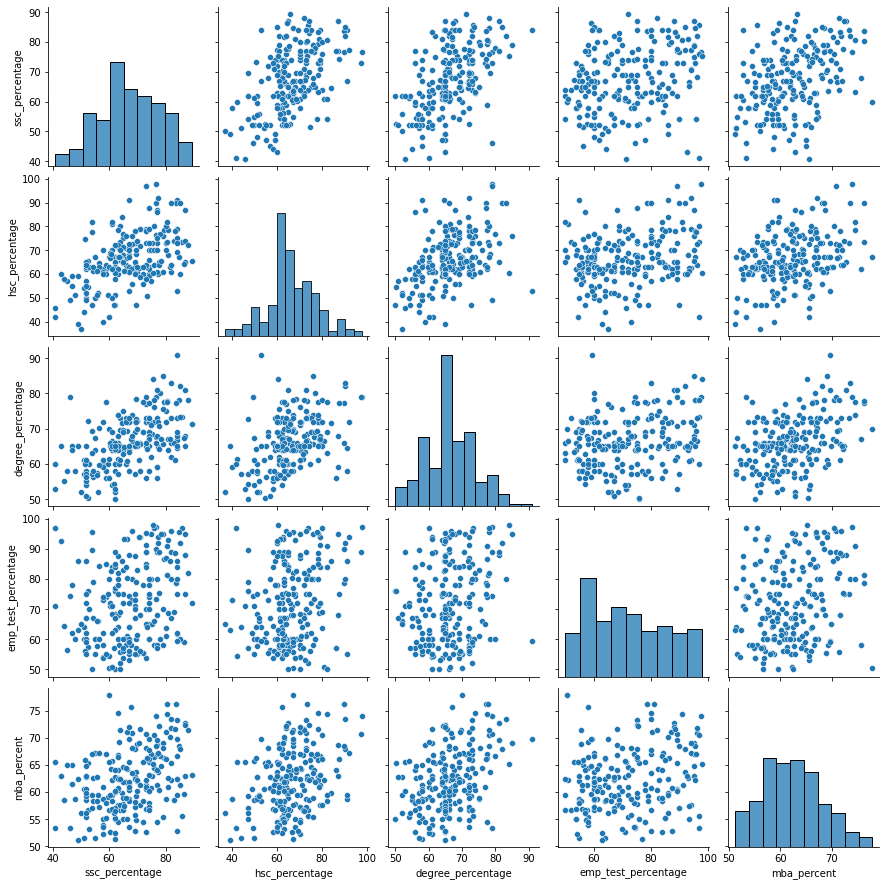

In [8]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

Визуально, в данных возможны выбросы, необходима проверка. Можно заметить, что все числовые признаки, кроме emp_test_percentage (оценка за тест на профпригодность) имеют близкое к нормальному распределение. 

<AxesSubplot:>

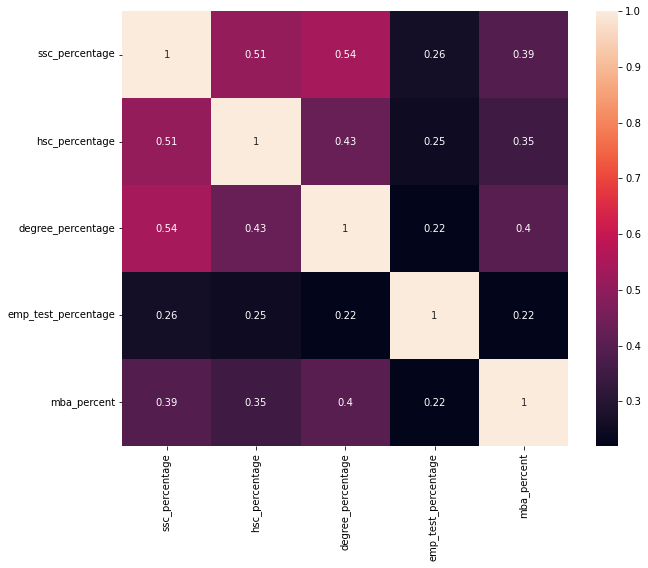

In [9]:
correlation = df.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot = True)

Сильной корреляции между признаками нет. Есть слабая корреляция между такими данными как ssc_percentage, hsc_percentage, degree_percentage (оценка в средней, старшей школе и бакалавриате).  

Давайте теперь все таки посмотрим, каких соискателей чаще всего принимают на работу (по отношению к целевой переменной target):

<AxesSubplot:xlabel='status', ylabel='count'>

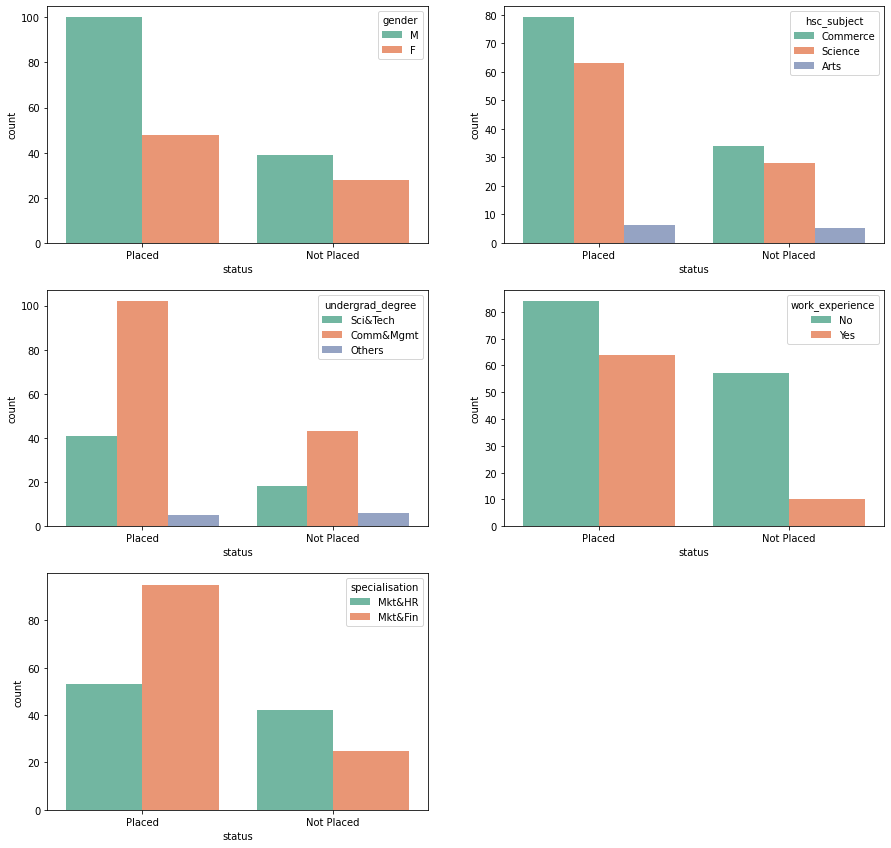

In [10]:
plt.figure(figsize = (15, 20))

plt.subplot(4,2,1)
sns.countplot(x = 'status', hue = 'gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'status', hue = 'hsc_subject', palette = 'Set2', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'status', hue = 'undergrad_degree', palette = 'Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'status', hue = 'work_experience', palette = 'Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'status', hue = 'specialisation', palette = 'Set2', data = df)

Легко заметить, что мужчин принимают на работу чаще, что имея профиль Arts (искусство) устроиться на работу достаточно сложно, быстрее других устраиваются студенты, закончившие бакалавриат с профилем Commerce (бизнес) или магистратуру по направлению Mkt&Fin, а так же студенты уже имеющие опыт работы.  

### Анализ выбросов

Проверим данные на наличие выбросов

<AxesSubplot:xlabel='mba_percent'>

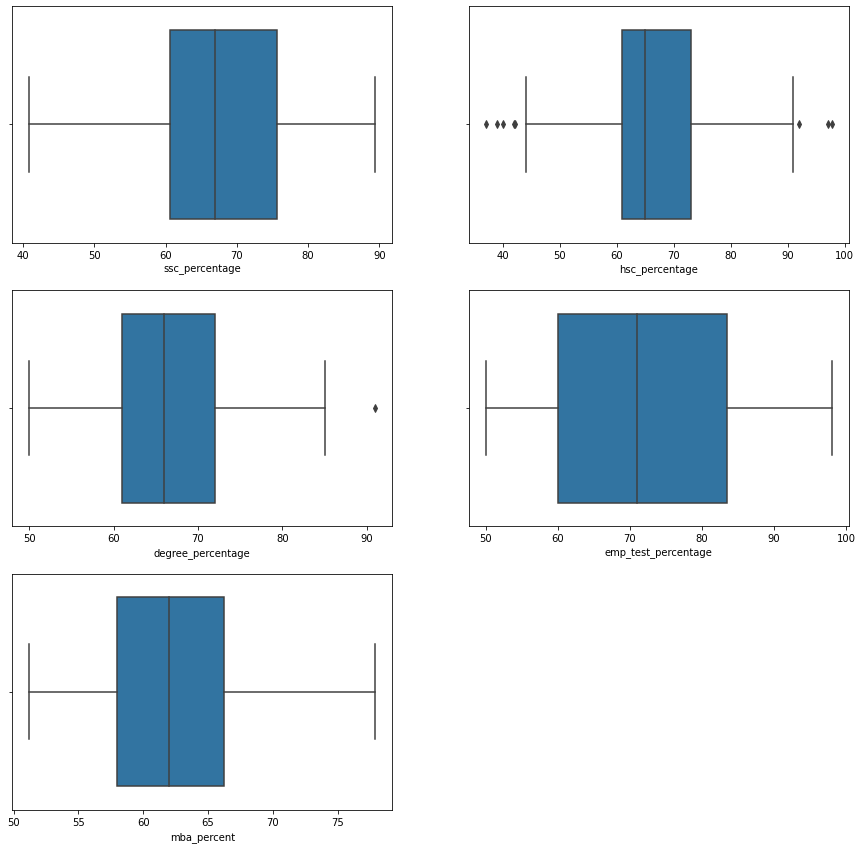

In [11]:
plt.figure(figsize = (15, 20))

plt.subplot(4,2,1)
sns.boxplot(x=df["ssc_percentage"])

plt.subplot(4,2,2)
sns.boxplot(x=df["hsc_percentage"])

plt.subplot(4,2,3)
sns.boxplot(x=df["degree_percentage"])

plt.subplot(4,2,4)
sns.boxplot(x=df["emp_test_percentage"])

plt.subplot(4,2,5)
sns.boxplot(x=df["mba_percent"])

In [12]:
Q1 = df['hsc_percentage'].quantile(0.25)  # удалим выбросы у признака 'hsc_percentage'
Q3 = df['hsc_percentage'].quantile(0.75)
IQR  = Q3 - Q1                            
lower_l = Q1 - 1.5 * IQR 
upper_l = Q3 + 1.5 * IQR
df = df[~((df.loc[:,['hsc_percentage']] < lower_l) | (df.loc[:,['hsc_percentage']] > upper_l)).any(axis=1)]
df.shape

(207, 13)

### Автокорреляция

Построим график автокорреляции, например, для признака ssc_percentage

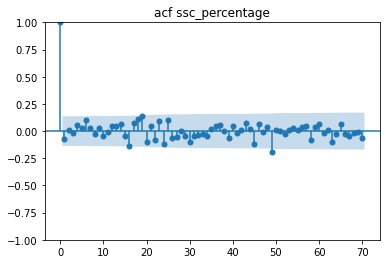

In [13]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(df["ssc_percentage"], lags = 70, title = "acf ssc_percentage")
plt.show()

Горизонтальный конус отображает уровень достоверности (по умолчанию он установлен на 95%). Другими словами, если точка находится за пределами конуса (на белом фоне), мы можем сказать, что с вероятностью 95% эта точка оказывает определенное влияние на другие значения. Если точка находится внутри конуса (на синем фоне), можно игнорировать это конкретное отставание, поскольку, скорее всего, оно не имеет значения. Вертикальная шкала значений показывает насколько прошлые точки данных влияют на последующие.

Признак ssc_percentage, как и все остальные, не является временным рядом. В разрезе нашего набора данных, логичнее было бы оценивать автокорреляцию экзаменационных оценок по каждому отдельному соискателю, тогда зависимость была бы очевидна. Но у нас не стоит задача спрогнозировать оценку студента. Следовательно, полученный выше график не корректен и не имеет для нас полезной информации.

### Мультиколлинеарность  

Преобразуем категориальные переменные в числовые. Для этого воспользуемся LabelEncoder(), нормализуем, затем еще раз построим тепловую карту, чтоб определить признаки с наиболее тесной корреляцией

In [14]:
label_encoder_gender = LabelEncoder()
label_encoder_ssc_board = LabelEncoder()
label_encoder_hsc_board = LabelEncoder()
label_encoder_hsc_subjects = LabelEncoder()
label_encoder_undergrad_degree = LabelEncoder()
label_encoder_work_experience = LabelEncoder()
label_encoder_specialisation = LabelEncoder()
label_encoder_status = LabelEncoder()

df['gender'] = label_encoder_gender.fit_transform(df['gender'])
df['ssc_board'] = label_encoder_ssc_board.fit_transform(df['ssc_board'])
df['hsc_board'] = label_encoder_hsc_board.fit_transform(df['hsc_board'])
df['hsc_subject'] = label_encoder_hsc_subjects.fit_transform(df['hsc_subject'])
df['undergrad_degree'] = label_encoder_undergrad_degree.fit_transform(df['undergrad_degree'])
df['work_experience'] = label_encoder_work_experience.fit_transform(df['work_experience'])
df['specialisation'] = label_encoder_specialisation.fit_transform(df['specialisation'])
df['status'] = label_encoder_status.fit_transform(df['status'])

In [15]:
from sklearn import preprocessing # Нормализуем
import pandas as pd

scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1.0,0.538240,1.0,1.000000,1.0,0.5,0.195122,1.0,0.0,0.104167,1.0,0.282331,1.0
1,1.0,0.792414,0.0,0.730426,1.0,1.0,0.670244,1.0,1.0,0.760417,0.0,0.563534,1.0
2,1.0,0.497011,0.0,0.510638,0.0,0.0,0.341463,0.0,0.0,0.520833,0.0,0.244737,1.0
3,1.0,0.311482,0.0,0.170213,0.0,1.0,0.048780,1.0,0.0,0.333333,1.0,0.306015,0.0
4,1.0,0.925788,0.0,0.629787,0.0,0.5,0.568293,0.0,0.0,0.975000,0.0,0.158271,1.0


<AxesSubplot:>

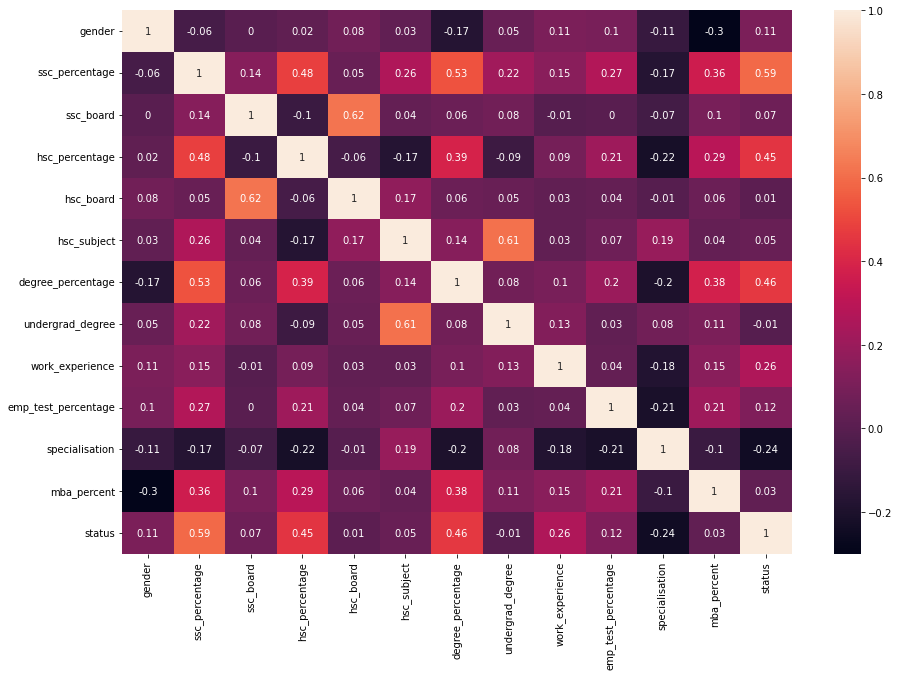

In [16]:
correlation = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True)

Возьмем пороговое значение corr >= 0,50 и посчитаем для всех признаков в этом диапазоне коэффициент инфляции дисперсии (VIF). Он измеряет силу корреляции между предикторными переменными в модели.  


VIF = 1: нет корреляции между данной переменной-предиктором и любыми другими переменными-предикторами в модели.  

VIF между 1 и 5: существует умеренная корреляция между данной переменной-предиктором и другими переменными-предикторами в модели.  

VIF> 5: существует серьезная корреляция между данной переменной-предиктором и другими переменными-предикторами в модели.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(considered_features):
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [18]:
considered_features = [
    'status', 'undergrad_degree', 'degree_percentage', 'hsc_subject', 'hsc_board', 'ssc_board', 'ssc_percentage'
]
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
6,ssc_percentage,1.946076
3,hsc_subject,1.763597
4,hsc_board,1.741822
5,ssc_board,1.716858
1,undergrad_degree,1.674157
0,status,1.657981
2,degree_percentage,1.460642


Мультиколлинеарности нет, либо она умеренная.  

### PCA

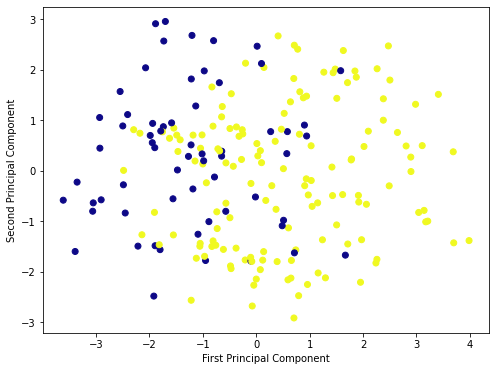

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('status', axis=1))
scaled_features = scaler.transform(df.drop('status', axis=1))

pca = PCA(n_components=4)
pca.fit(scaled_features)
df_pca = pca.transform(scaled_features)
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0], df_pca[:,1], c=df['status'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## ML: классификационные и регрессионные модели  

Так как природа зависимости между target-ом и данными сводится к бинарной классификацие (принят / не принят на работу), то далее рассмотрим только одну регрессионную модель, остальные модели возьмем для классификации

In [20]:
X = df.drop('status', axis = 1)
y = df['status']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3, random_state=42)  # тестовая выборка 30%

In [23]:
models={
    "Logisitic Regression" :LogisticRegression(max_iter=20000),
    "Decision Tree" :DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    
    "Support Vector Machine": svm.SVC(),
    "Multinomial Naive Bayes": MultinomialNB()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train.values.ravel()) # обучаем модель
    y_train_pred = model.predict(X_train)     # делаем прогнозы
    y_test_pred =  model.predict(X_test)

# Считаем метрики для модели
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 
    
# Считаем метрики для теста
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 


    print(list(models.keys())[i])
    print('_____Training_____')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 score: {:4f}'.format(model_train_f1))
    print('Precision: {:4f}'.format(model_train_precision))
    print('Recall: {:4f}'.format(model_train_recall))
    print('\n')
    print('_______Test_______')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))
    print('\n')
    print('='*30)
    print('\n')

Logisitic Regression
_____Training_____
Accuracy: 0.9028
F1 score: 0.899532
Precision: 0.906984
Recall: 0.902778


_______Test_______
Accuracy: 0.8730
F1 score: 0.8730
Precision: 0.8730
Recall: 0.8730




Decision Tree
_____Training_____
Accuracy: 1.0000
F1 score: 1.000000
Precision: 1.000000
Recall: 1.000000


_______Test_______
Accuracy: 0.7937
F1 score: 0.7961
Precision: 0.7991
Recall: 0.7937




Random Forest
_____Training_____
Accuracy: 1.0000
F1 score: 1.000000
Precision: 1.000000
Recall: 1.000000


_______Test_______
Accuracy: 0.8889
F1 score: 0.8902
Precision: 0.8921
Recall: 0.8889




K-Nearest Neighbors
_____Training_____
Accuracy: 0.8403
F1 score: 0.837917
Precision: 0.837823
Recall: 0.840278


_______Test_______
Accuracy: 0.7778
F1 score: 0.7715
Precision: 0.7669
Recall: 0.7778




Support Vector Machine
_____Training_____
Accuracy: 0.9375
F1 score: 0.935666
Precision: 0.942857
Recall: 0.937500


_______Test_______
Accuracy: 0.8571
F1 score: 0.8507
Precision: 0.8497
Recall:

Лучшими прогнозными качествами обладает модель: RandomForestClassifier(). Посмотрим есть ли переобучение и попробуем настроить гипперпараметры модели. 

In [24]:
from sklearn import metrics
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Training Accuracy : ', metrics.accuracy_score(y_train, model.predict(X_train))*100)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, model.predict(X_test))*100)

Training Accuracy :  100.0
Validation Accuracy :  87.3015873015873


Мы видим, что точность обучения составляет 100%, но точность проверки меньше, это означает что модель переобучается.

In [25]:
model = RandomForestClassifier(max_depth=5, random_state=50)
model.fit(X_train, y_train)
print('Training Accuracy : ', metrics.accuracy_score(y_train, model.predict(X_train))*100)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, model.predict(X_test))*100)

Training Accuracy :  96.52777777777779
Validation Accuracy :  90.47619047619048


### Feature Selection  

Проанализируем и выделим наиболее важные признаки

#### Метод фильтрации (filter methods).  
Сбор информации (Information Gain, IG) вычисляет уменьшение энтропии в результате преобразования набора данных. Его можно использовать для отбора признаков путем оценки информационного прироста каждой переменной в контексте целевой переменной.

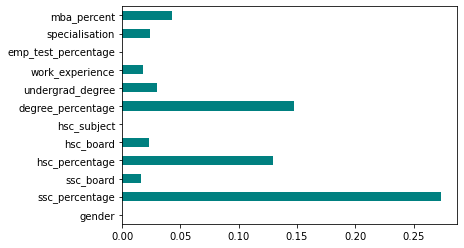

In [26]:
from sklearn.feature_selection import mutual_info_classif  # Information Gain
import matplotlib.pyplot as plt

importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

#### Random Forest Importance  
Feature Selection на основе Random Forest Importance, естественным образом ранжируются по тому, насколько хорошо они улучшают чистоту модели в плане данных. Т.о., “обрезая” деревья ниже определенного коэффициента, мы можем подобрать наиболее важные признаки. Посчитаем на основе данных полученных на нашей модели

<AxesSubplot:>

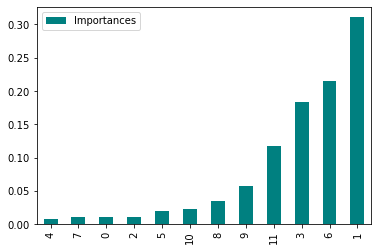

In [27]:
# Подбираем самые важные признаки
importances = model.feature_importances_

# Создаем отдельный датасет для визуализации
final_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
final_df.set_index('Importances')

# Сортируем их по возрастанию для лучшей визуализации
final_df = final_df.sort_values('Importances')

# Выводим на график
final_df.plot.bar(color = 'teal')

Так кого же в первую очередь берут на работу? Оба метода наиболее важными признаками считают: ssc_percentage (средний экзаменационный балл при окончании средней школы), hsc_percentage (средний экзаменационный балл при окончании старшей школы), degree_percentage (средний экзаменационный балл в бакалавриате), mba_percentage (средний экзаменационный балл в магистратуре). 